### Introdução

Saneamento básico é uma necessidade essencial para o bem estar de uma população, que em alguns países pode apresentar uma certa dificuldade para a instalação desse saneamento, principalmente para aqueles que possuem um IDH baixo. 

Uma hipótese levantada neste projeto seria que, considerando o IDH do país e se ele tem condições de fornecer as necessidades básicas da população, a área dificulta/facilita a instalação de saneamento básico no país inteiro? Para responder essa pergunta, é necessário coletar os dataframes de área, IDH e a porcentagem de saneamento, para assim comparar os dados e observar se eles são, de alguma forma, correlatos.



### Pergunta formalizada:

#### Um país apresenta dificuldades/facilidades de fornecer saneamento básico para sua população em conta de sua área total e IDH?

In [36]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np

#### Leitura dos dados:

In [37]:

dados_IDH = pd.read_excel('IDH2.xlsx')
dados_saneamento = pd.read_excel('Saneamento2.xlsx')
dados_area = pd.read_excel('Area2.xlsx')


#### Leitura das colunas

In [38]:

IDH_2012 = dados_IDH.loc[:, ["IDH", 2012]]
saneamento_2012 = dados_saneamento.loc[:, ["% de Saneamento", 2012]]
area_2012 = dados_area.loc[:, ["Area", 2012]]


#### Colocando o mesmo índice para todos

In [39]:

IDH_idx = IDH_2012.set_index('IDH')
sane_idx = saneamento_2012.set_index('% de Saneamento')
area_idx = area_2012.set_index('Area')


#### Junção dos DataFrames

In [47]:

df = IDH_idx.join(sane_idx, how='inner', lsuffix='_IDH', rsuffix='_% de saneamento')
dados = df.join(area_idx, how='inner',lsuffix='_area')


dados_r = dados.rename(columns={'2012_IDH':'IDH',2012:'Área', '2012_% de saneamento': '% de saneamento'})
area = dados_r['Área']

dados_r['Log Área'] = np.log(area)

dados_r



,IDH,% de saneamento,Área,Log Área
Afghanistan,0.470,35.8,653000,13.389332
Albania,0.759,96.8,28800,10.268131
Algeria,0.737,87.0,2380000,14.682611
Andorra,0.843,100.0,470,6.152733
Angola,0.523,35.6,1250000,14.038654
Antigua and Barbuda,0.781,87.1,440,6.086775
Argentina,0.823,94.8,2780000,14.837961
Armenia,0.736,91.3,29700,10.298902
Australia,0.933,100.0,7740000,15.861912
Austria,0.887,100.0,83900,11.337381


In [41]:
def dispersao_com_reta(dados, variavel_x, variavel_y):
    dados_X = dados[variavel_x]
    dados_Y = dados[variavel_y]
    
    cov = dados_X.cov(dados_Y)

    var_X = dados_X.var()
    var_Y = dados_Y.var()

    mX = dados_X.mean()
    mY = dados_Y.mean()
    
    a = cov / var_X
    b = mY - a*mX

    min_X = dados_X.min()
    max_X = dados_X.max()

    plt.scatter(dados_X, dados_Y)  
    plt.plot((min_X, max_X), (a*min_X + b, a*max_X + b), color='red')

    plt.title('{0} versus {1}'.format(variavel_x, variavel_y))
    plt.xlabel(variavel_x)
    plt.ylabel(variavel_y)
    
    return a, b

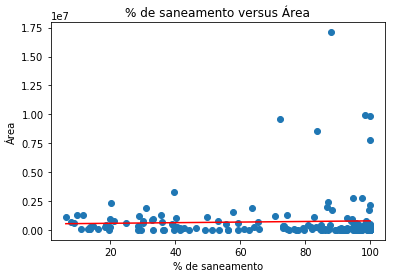

In [57]:
a, b = dispersao_com_reta(dados_r, variavel_x="% de saneamento", variavel_y='Área')

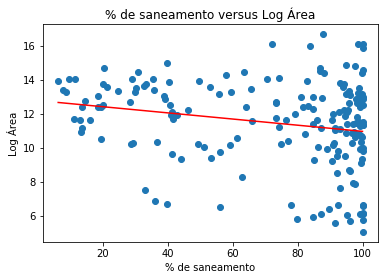

In [48]:
a, b = dispersao_com_reta(dados_r, variavel_x="% de saneamento", variavel_y='Log Área')

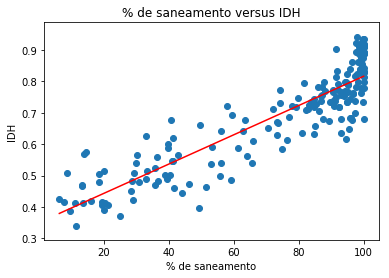

In [17]:
a, b = dispersao_com_reta(dados_r, variavel_x="% de saneamento", variavel_y="IDH")

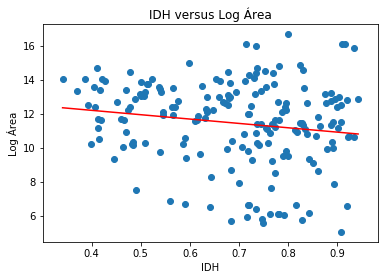

In [49]:
a, b = dispersao_com_reta(dados_r, variavel_x="IDH", variavel_y="Log Área")

In [56]:
dados_r.corr()

,IDH,% de saneamento,Área,Log Área
IDH,1.000000,0.895257,0.104072,-0.159155
% de saneamento,0.895257,1.000000,0.040059,-0.216280
Área,0.104072,0.040059,1.000000,0.503603
Log Área,-0.159155,-0.216280,0.503603,1.000000


### Conclusão:

Com a análise dos dados e gráficos, percebemos uma relação de área e porcentagem de saneamento básico. No primeiro gráfico, comparando a área do país e a porcentagem de saneamento, vemos uma concentração de pontos na parte inferior do gráfico, com alguns 'outliners' acima dessa concentração e com uma relação de aproximadamente 0.04 (4%) entre essas duas variáveis, o que demonstra uma diferença significativa. Porém, ao calcular o log dessas áreas e criar um gráfico versus a porcentagem de saneamento, vemos um comportamento diferente do anterior, onde a relação das variáveis é de -0.21 (-21%), que representa uma correlação mais forte comparando com o outro gráfico. Isso representa que a relação dessas variáveis não é exatamente linear, mas sim logarítimica, onde o log da área dos países é mais correlato (de forma decrescente) com a porcentagem de saneamento do que com o número absoluto da área.

Comparando essas variáveis com IDH, a porcentagem de saneamento apresenta uma correlação muito alta com o IDH, com um coeficiente de correlação de 0.89 (89%), o que é o esperado, pois quanto mais desenvolvido é o país, mais ele tem condições de fornecer essa infraestrutura para sua população. Já quando comparando o log da área com o IDH, o gráfico não apresenta uma correlação considerável (cerca de -0.15).

Com isso, não podemos ter uma resposta consistente devido á inconsistência dos gráficos de dispersão, ao qual não apresentam uma relação considerável e não pode concluir se realmente a área de um país apresenta uma dificuldade/facilidade para ter saneamento básico em sua totalidade, considerando se o país tem condições para fornece-lo